In [2]:
import pandas as pd

df = pd.read_csv("simulation_results.csv")

print(len(df))

df = df.dropna()

print(len(df))

df

4299
4235


,N1,N2,N1_layer,N2_layer,per,w1,l1,l2,l2_gap,h1,...,Temp_max_winding2,Temp_mean_winding2,Temp_max_leg_left,Temp_max_leg_right,Temp_max_leg_top,Temp_max_leg_bottom,Temp_mean_leg_left,Temp_mean_leg_right,Temp_mean_leg_top,Temp_mean_leg_bottom
0,6,6,1,2,13461,102.0,33.0,107.894797,46.9,79.4,...,49.999994,49.999994,102.260614,113.156946,73.093740,73.062527,99.188433,110.492682,63.551246,63.518620
1,8,8,2,1,21727,318.0,33.6,130.982120,49.0,81.9,...,51.444482,50.007313,52.613031,52.823602,50.959359,50.969579,52.470015,52.729198,50.624376,50.613376
2,6,6,2,1,8263,304.0,24.6,101.364429,26.1,100.6,...,49.999994,49.999994,63.236169,62.413354,52.559687,52.584685,62.960613,61.917924,51.672778,51.690459
3,6,6,2,1,19886,319.5,32.9,112.873400,28.4,126.5,...,49.999994,49.999994,57.621973,58.364313,52.138935,52.133306,57.152927,58.046511,51.324823,51.335486
4,8,8,2,1,17958,283.3,30.0,104.393667,5.4,50.5,...,49.999994,49.999994,52.764185,52.778497,51.303907,51.305924,52.629590,52.647204,50.845974,50.848928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,7,7,2,2,19599,215.8,25.4,90.858652,16.2,59.9,...,49.999994,49.999994,58.503076,60.157465,53.922172,53.931443,57.863424,59.844134,52.485554,52.492463
4295,6,6,1,1,8531,294.9,21.7,93.130480,27.9,148.4,...,49.999994,49.999994,64.662592,73.618280,52.986313,52.995779,63.949815,72.408533,51.938713,51.935513
4296,6,6,2,2,4529,283.0,36.5,154.745120,27.9,98.1,...,49.999994,49.999994,57.525934,57.929407,52.354158,52.351191,57.076966,57.598733,51.525752,51.529989
4297,10,10,1,1,25465,227.2,15.4,73.530275,7.4,147.7,...,49.999994,49.999994,76.824274,72.023065,51.950892,51.880222,76.334220,69.554914,51.195710,51.178560


In [3]:
input_parameter_columns = ["N1", "N2", "N1_layer", "N2_layer", "per", "w1", "l1", "l2", "l2_gap", "h1", "h1_gap", "h2_gap", "N1_height_ratio", "N1_fill_factor", "N1_coil_diameter", "N1_coil_zgap", "N2_height_ratio", "N2_fill_factor", "N2_coil_diameter", "N2_coil_zgap", "N1_space_w", "N1_space_l", "N2_space_w", "N2_space_l", "N1_layer_gap", "N2_layer_gap", "N1_offset_ratio", "N2_offset_ratio", "N1_offset", "N2_offset", "cold_plate_x", "cold_plate_y", "cold_plate_z1", "cold_plate_z2", "mold_thick", "thermal_conductivity"]
output_parameter_columns = ["Lmt", "Llt", "Lmt.1", "Llt.1", "P_winding1", "P_winding2", "P_Core.1", "B_mean_leg_left.1", "B_mean_leg_right.1", "B_mean_leg_top.1", "B_mean_leg_bottom.1",
                            "Temp_max_core", "Temp_mean_core", "Temp_max_leg_left", "Temp_max_leg_right", "Temp_max_leg_top", "Temp_max_leg_bottom"]
output_parameter_name = ["Lmt1", "Llt1", "Lmt2", "Llt2", "P_winding1", "P_winding2", "P_core", "B_mean_leg_left", "B_mean_leg_right", "B_mean_leg_top", "B_mean_leg_bottom",
                         "Temp_max_core", "Temp_mean_core", "Temp_max_leg_left", "Temp_max_leg_right", "Temp_max_leg_top", "Temp_max_leg_bottom"]

for output_parameter, output_parameter_name in zip(output_parameter_columns, output_parameter_name):

    input = df[input_parameter_columns]
    output = df[output_parameter]
    output = output.rename(output_parameter_name)

    data = pd.concat([input, output], axis=1)

    # 데이터 이상치 제거
    outlier_constant = 1.5  # IQR에 곱해질 상수 (조정 가능) (default : 1.5)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # IQR 방식으로 이상치 제거
    data_filtered = data[~((data < (Q1 - outlier_constant * IQR)) | (data > (Q3 + outlier_constant * IQR))).any(axis=1)]

    print("원본 데이터 크기:", len(data))
    print("이상치 제거 후 데이터 크기:", len(data_filtered))

    # 필터링된 데이터로 업데이트
    data = data_filtered

    data.to_csv(f"data_{output_parameter_name}.csv", index=False)

원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3115
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3235
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3118
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3232
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3169
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3185
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3118
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3148
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3149
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3148
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3148
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3041
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3042
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3036
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3038
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3019
원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3021


원본 데이터 크기: 4235
이상치 제거 후 데이터 크기: 3563


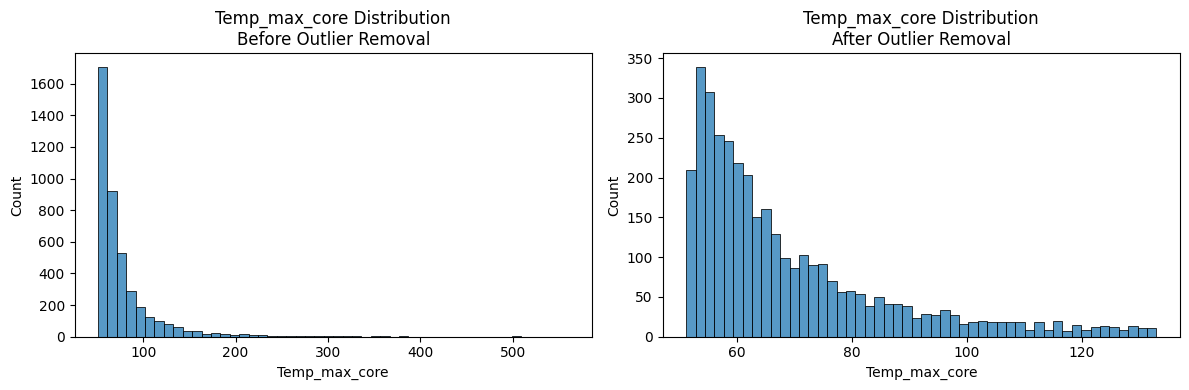

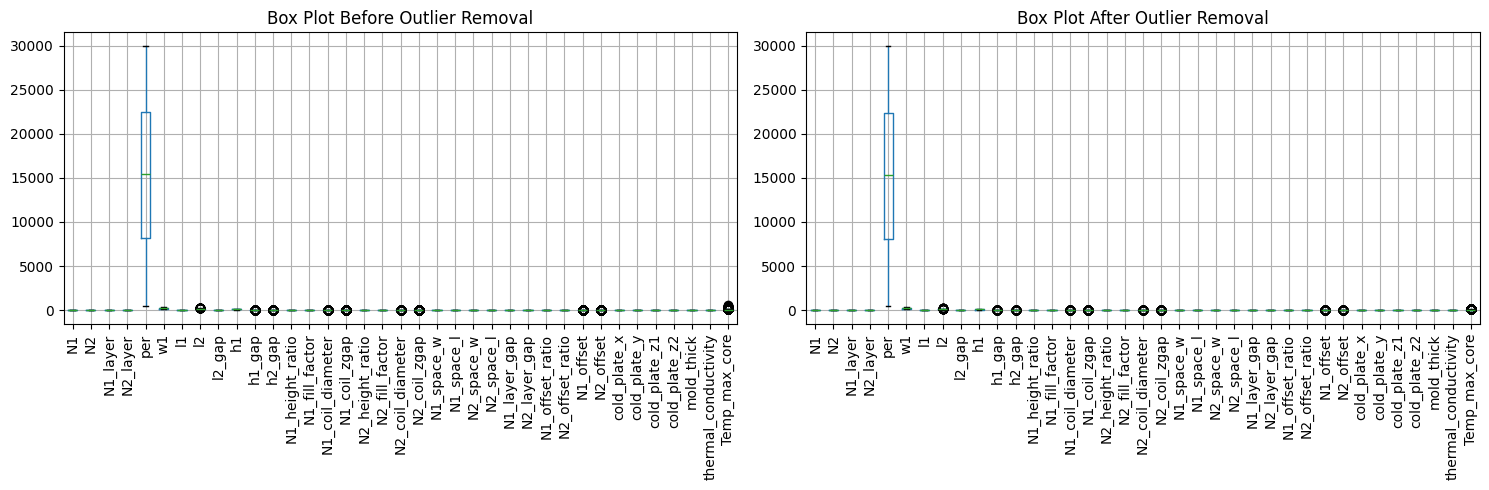

,N1,N2,N1_layer,N2_layer,per,w1,l1,l2,l2_gap,h1,...,N2_offset_ratio,N1_offset,N2_offset,cold_plate_x,cold_plate_y,cold_plate_z1,cold_plate_z2,mold_thick,thermal_conductivity,Temp_max_core
0,6,6,1,2,13461,102.0,33.0,107.894797,46.9,79.4,...,-0.63,2.358180,-5.50242,7.7,24.1,23.1,0.49,13.6,0.92,113.156946
1,8,8,2,1,21727,318.0,33.6,130.982120,49.0,81.9,...,0.41,13.382460,6.04422,2.7,16.4,15.3,0.16,26.6,1.04,52.823602
2,6,6,2,1,8263,304.0,24.6,101.364429,26.1,100.6,...,0.65,-7.484640,19.61700,23.9,29.9,41.6,0.29,28.2,0.20,63.236169
3,6,6,2,1,19886,319.5,32.9,112.873400,28.4,126.5,...,-0.56,-7.438200,-18.06420,29.6,3.8,37.7,0.20,10.7,0.79,58.364313
4,8,8,2,1,17958,283.3,30.0,104.393667,5.4,50.5,...,0.06,1.439250,0.40905,24.9,20.3,15.8,0.31,27.7,0.64,52.778497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,7,7,2,2,19599,215.8,25.4,90.858652,16.2,59.9,...,0.56,6.888500,6.87652,9.8,12.1,21.0,0.27,17.0,1.79,60.157465
4295,6,6,1,1,8531,294.9,21.7,93.130480,27.9,148.4,...,-0.56,-10.751580,-21.60704,1.6,24.4,12.7,0.14,10.2,2.00,73.618280
4296,6,6,2,2,4529,283.0,36.5,154.745120,27.9,98.1,...,0.02,-10.712520,0.51012,12.3,4.3,29.0,0.19,28.8,0.79,57.929407
4297,10,10,1,1,25465,227.2,15.4,73.530275,7.4,147.7,...,-0.14,-3.256785,-2.58475,24.1,26.7,13.7,0.36,30.9,0.21,76.824274


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 입력 및 출력 파라미터 정의
input_parameter_columns = ["N1", "N2", "N1_layer", "N2_layer", "per", "w1", "l1", "l2", "l2_gap", 
                         "h1", "h1_gap", "h2_gap", "N1_height_ratio", "N1_fill_factor", "N1_coil_diameter",
                         "N1_coil_zgap", "N2_height_ratio", "N2_fill_factor", "N2_coil_diameter", "N2_coil_zgap",
                         "N1_space_w", "N1_space_l", "N2_space_w", "N2_space_l", "N1_layer_gap", "N2_layer_gap",
                         "N1_offset_ratio", "N2_offset_ratio", "N1_offset", "N2_offset", "cold_plate_x",
                         "cold_plate_y", "cold_plate_z1", "cold_plate_z2", "mold_thick", "thermal_conductivity"]
output_parameter_column = ["Temp_max_core"]

# 데이터 준비
def prepare_data(df, input_cols, output_cols):
    input_data = df[input_cols]
    output_data = df[output_cols]
    return pd.concat([input_data, output_data], axis=1)

# 이상치 제거 함수
def remove_outliers(data, outlier_constant=2.0):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    data_filtered = data[~((data < (Q1 - outlier_constant * IQR)) | 
                          (data > (Q3 + outlier_constant * IQR))).any(axis=1)]
    
    print("원본 데이터 크기:", len(data))
    print("이상치 제거 후 데이터 크기:", len(data_filtered))
    
    return data_filtered

# 데이터 시각화 함수
def plot_distributions(original_data, filtered_data, target_col):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=original_data, x=target_col, bins=50)
    plt.title(f'{target_col} Distribution\nBefore Outlier Removal')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data=filtered_data, x=target_col, bins=50)
    plt.title(f'{target_col} Distribution\nAfter Outlier Removal')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

def plot_boxplots(original_data, filtered_data):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    original_data.boxplot()
    plt.xticks(rotation=90)
    plt.title('Box Plot Before Outlier Removal')
    
    plt.subplot(1, 2, 2)
    filtered_data.boxplot()
    plt.xticks(rotation=90)
    plt.title('Box Plot After Outlier Removal')
    
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
data = prepare_data(df, input_parameter_columns, output_parameter_column)
data_filtered = remove_outliers(data)

# 시각화
plot_distributions(df, data_filtered, 'Temp_max_core')
plot_boxplots(data, data_filtered)

# 필터링된 데이터로 업데이트
data = data_filtered
data
